# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

n     Energy            log10(ΔE)   log10(Δρ)   Δtime
---   ---------------   ---------   ---------   ------
  1   +27.46050143772                   -1.40    5.30s
  2   +19.99436683922        0.87       -0.77   11.1ms
  3   +13.50953883973        0.81       -0.42   10.9ms
  4   +10.57697326142        0.47       -0.49   10.8ms
  5   +9.681076041527       -0.05       -0.74   8.81ms
  6   +9.297803876220       -0.42       -0.88   8.87ms
  7   +8.929320719575       -0.43       -0.91   8.82ms
  8   +8.519835333423       -0.39       -1.04   8.84ms
  9   +8.267748910254       -0.60       -1.03   8.79ms
 10   +8.117915030768       -0.82       -1.01   8.72ms
 11   +8.022422059674       -1.02       -1.07   8.71ms
 12   +7.955018705317       -1.17       -1.13   8.71ms
 13   +7.896040938321       -1.23       -1.14   8.69ms
 14   +7.852724450953       -1.36       -1.12   53.2ms
 15   +7.827343404502       -1.60       -1.07   9.32ms
 16   +7.803271549166       -1.62       -1.30   6.99ms
 17   +7.78

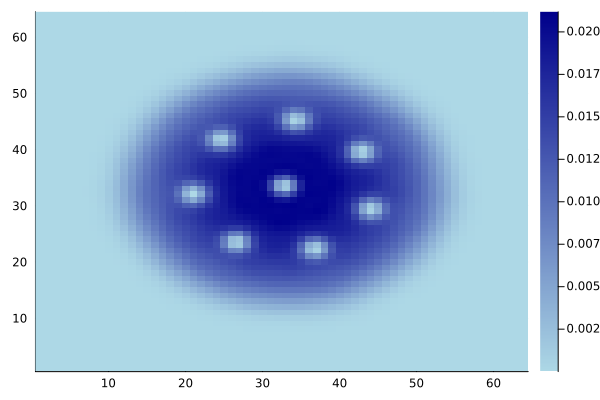

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)